<a href="https://colab.research.google.com/github/tatendajoes/AMD-Hardware-Competition-2025/blob/main/RUL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn plotly
!pip install tensorflow keras
!pip install scipy
!pip install librosa  # for signal processing
!pip install tqdm     # for progress bars

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
import scipy.stats as stats
from scipy import stats
from scipy.fft import fft
from scipy.signal import welch
from tqdm import tqdm
import librosa
from scipy.stats import entropy
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_path_1st = '/content/drive/MyDrive/AMD Dataset/IMS/IMS/1st_test/1st_test'
dataset_path_2nd = '/content/drive/MyDrive/AMD Dataset/IMS/IMS/2nd_test/2nd_test'

In [5]:
# Check if paths exist
print("1st test path exists:", os.path.exists(dataset_path_1st))
print("2nd test path exists:", os.path.exists(dataset_path_2nd))

# List files in each directory
print("\nFiles in 1st test:")
print(os.listdir(dataset_path_1st)[:5])  # Show first 5 files

1st test path exists: True
2nd test path exists: True

Files in 1st test:
['2003.11.16.00.58.46', '2003.11.16.01.08.46', '2003.11.16.01.18.46', '2003.11.16.01.28.46', '2003.11.16.01.38.46']


In [6]:
# Fix the paths to point to the actual data directories
# dataset_path_1st = '/content/drive/MyDrive/AMD Dataset/IMS/IMS/1st_test/1st_test'
# dataset_path_2nd = '/content/drive/MyDrive/AMD Dataset/IMS/IMS/2nd_test/2nd_test'

# Let's explore the actual structure
print("=== EXPLORING ACTUAL STRUCTURE ===")

# Check what's in the 1st test directory
print("1st test directory contents:")
if os.path.exists(dataset_path_1st):
    contents = os.listdir(dataset_path_1st)
    print(f"Number of items: {len(contents)}")
    print(f"First 10 items: {contents[:10]}")

    # Check if these are files or directories
    for item in contents[:5]:
        item_path = os.path.join(dataset_path_1st, item)
        if os.path.isdir(item_path):
            print(f"{item} is a directory")
            sub_contents = os.listdir(item_path)
            print(f"  Contains {len(sub_contents)} items")
            print(f"  Sample: {sub_contents[:3]}")
        else:
            print(f"{item} is a file")

# Check what's in the 2nd test directory
print("\n2nd test directory contents:")
if os.path.exists(dataset_path_2nd):
    contents = os.listdir(dataset_path_2nd)
    print(f"Number of items: {len(contents)}")
    print(f"First 10 items: {contents[:10]}")

    # Check if these are files or directories
    for item in contents[:5]:
        item_path = os.path.join(dataset_path_2nd, item)
        if os.path.isdir(item_path):
            print(f"{item} is a directory")
            sub_contents = os.listdir(item_path)
            print(f"  Contains {len(sub_contents)} items")
            print(f"  Sample: {sub_contents[:3]}")
        else:
            print(f"{item} is a file")

# Let's also check the parent directory structure
print("\nParent directory structure:")
parent_dir = '/content/drive/MyDrive/AMD Dataset/IMS/IMS'
if os.path.exists(parent_dir):
    print("Available directories:")
    for item in os.listdir(parent_dir):
        item_path = os.path.join(parent_dir, item)
        if os.path.isdir(item_path):
            print(f"  {item}/")
            sub_items = os.listdir(item_path)
            print(f"    Contains: {sub_items[:5]}")

=== EXPLORING ACTUAL STRUCTURE ===
1st test directory contents:
Number of items: 2155
First 10 items: ['2003.11.16.00.58.46', '2003.11.16.01.08.46', '2003.11.16.01.18.46', '2003.11.16.01.28.46', '2003.11.16.01.38.46', '2003.11.16.01.58.46', '2003.11.16.01.48.46', '2003.11.16.02.08.46', '2003.11.16.02.18.46', '2003.11.16.02.28.46']
2003.11.16.00.58.46 is a file
2003.11.16.01.08.46 is a file
2003.11.16.01.18.46 is a file
2003.11.16.01.28.46 is a file
2003.11.16.01.38.46 is a file

2nd test directory contents:
Number of items: 984
First 10 items: ['2004.02.18.16.02.39', '2004.02.18.15.52.39', '2004.02.18.16.12.39', '2004.02.18.16.22.39', '2004.02.18.16.32.39', '2004.02.18.16.42.39', '2004.02.18.16.52.39', '2004.02.18.17.02.39', '2004.02.18.17.32.39', '2004.02.18.17.12.39']
2004.02.18.16.02.39 is a file
2004.02.18.15.52.39 is a file
2004.02.18.16.12.39 is a file
2004.02.18.16.22.39 is a file
2004.02.18.16.32.39 is a file

Parent directory structure:
Available directories:
  1st_test/
    C

=== TESTING DATA VISUALIZATION ===
Dataset shape: (20480, 8)
Columns: ['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y']


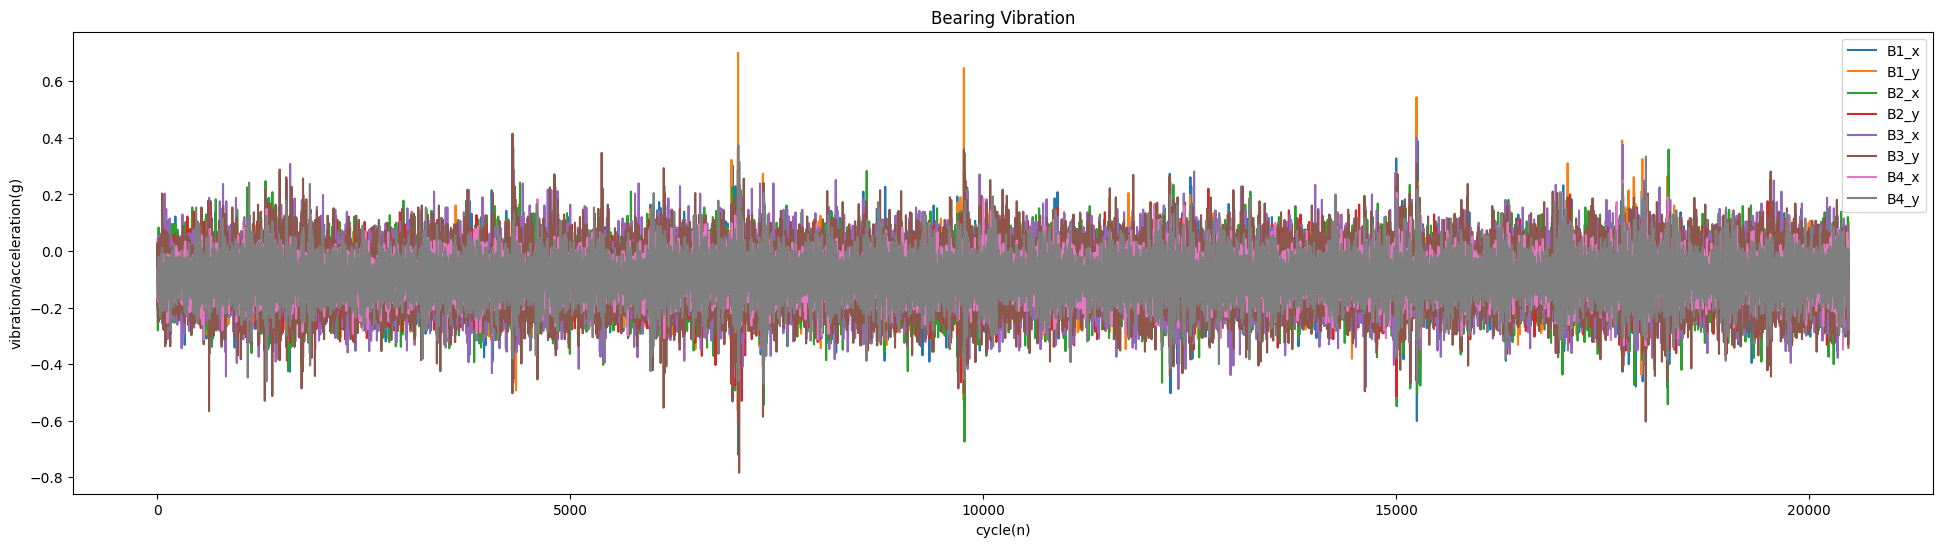

=== EXTRACTING FEATURES ===

Extracting features from 1st test...
Processing 2155 files from 1st_test


Extracting features: 100%|██████████| 2155/2155 [10:46<00:00,  3.33it/s]


1st test features shape: (2155, 96)
1st test features columns: ['B1_x_mean', 'B1_x_std', 'B1_x_skew', 'B1_x_kurtosis', 'B1_x_entropy', 'B1_x_rms', 'B1_x_max', 'B1_x_p2p', 'B1_x_crest', 'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse', 'B1_y_mean', 'B1_y_std', 'B1_y_skew', 'B1_y_kurtosis', 'B1_y_entropy', 'B1_y_rms', 'B1_y_max', 'B1_y_p2p', 'B1_y_crest', 'B1_y_clearence', 'B1_y_shape', 'B1_y_impulse', 'B2_x_mean', 'B2_x_std', 'B2_x_skew', 'B2_x_kurtosis', 'B2_x_entropy', 'B2_x_rms', 'B2_x_max', 'B2_x_p2p', 'B2_x_crest', 'B2_x_clearence', 'B2_x_shape', 'B2_x_impulse', 'B2_y_mean', 'B2_y_std', 'B2_y_skew', 'B2_y_kurtosis', 'B2_y_entropy', 'B2_y_rms', 'B2_y_max', 'B2_y_p2p', 'B2_y_crest', 'B2_y_clearence', 'B2_y_shape', 'B2_y_impulse', 'B3_x_mean', 'B3_x_std', 'B3_x_skew', 'B3_x_kurtosis', 'B3_x_entropy', 'B3_x_rms', 'B3_x_max', 'B3_x_p2p', 'B3_x_crest', 'B3_x_clearence', 'B3_x_shape', 'B3_x_impulse', 'B3_y_mean', 'B3_y_std', 'B3_y_skew', 'B3_y_kurtosis', 'B3_y_entropy', 'B3_y_rms', 'B3_y_ma

Extracting features: 100%|██████████| 984/984 [01:54<00:00,  8.57it/s]


2nd test features shape: (984, 48)
2nd test features columns: ['B1_mean', 'B1_std', 'B1_skew', 'B1_kurtosis', 'B1_entropy', 'B1_rms', 'B1_max', 'B1_p2p', 'B1_crest', 'B1_clearence', 'B1_shape', 'B1_impulse', 'B2_mean', 'B2_std', 'B2_skew', 'B2_kurtosis', 'B2_entropy', 'B2_rms', 'B2_max', 'B2_p2p', 'B2_crest', 'B2_clearence', 'B2_shape', 'B2_impulse', 'B3_mean', 'B3_std', 'B3_skew', 'B3_kurtosis', 'B3_entropy', 'B3_rms', 'B3_max', 'B3_p2p', 'B3_crest', 'B3_clearence', 'B3_shape', 'B3_impulse', 'B4_mean', 'B4_std', 'B4_skew', 'B4_kurtosis', 'B4_entropy', 'B4_rms', 'B4_max', 'B4_p2p', 'B4_crest', 'B4_clearence', 'B4_shape', 'B4_impulse']

=== FEATURE STATISTICS ===
1st test features summary:
         B1_x_mean     B1_x_std    B1_x_skew  B1_x_kurtosis  B1_x_entropy  \
count  2155.000000  2155.000000  2155.000000    2155.000000   2155.000000   
mean      0.127485     0.098575    -0.038606       0.998506      4.981077   
std       0.006073     0.005346     0.030227       0.197363      0.0744

In [7]:
# Visualize
print("=== TESTING DATA VISUALIZATION ===")

# Test for the first file
first_file = sorted(os.listdir(dataset_path_1st))[0]
first_file_path = os.path.join(dataset_path_1st, first_file)
dataset = pd.read_csv(first_file_path, sep='\t', header=None)

# Rename columns to match naming convention
if dataset.shape[1] == 8:  # 1st test has 8 sensors
    dataset.columns = ['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y']
elif dataset.shape[1] == 4:  # 2nd test has 4 sensors
    dataset.columns = ['B1', 'B2', 'B3', 'B4']

print(f"Dataset shape: {dataset.shape}")
print(f"Columns: {list(dataset.columns)}")

# Plot the data
ax = dataset.plot(figsize=(24, 6), title="Bearing Vibration", legend=True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

# feature extraction functions
def calculate_rms(df):
    """Root Mean Squared Sum"""
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

def calculate_p2p(df):
    """Extract peak-to-peak features"""
    return np.array(df.max().abs() + df.min().abs())

def calculate_entropy(df):
    """Extract shannon entropy (cut signals to 500 bins)"""
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)

def calculate_clearence(df):
    """Extract clearance factor"""
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    """
    Extract time-domain features from the dataset

    Args:
        dataset_path: Path to the dataset directory
        id_set: 1 for 1st test (8 sensors), 2 for 2nd test (4 sensors)
    """
    time_features = ['mean', 'std', 'skew', 'kurtosis', 'entropy', 'rms', 'max', 'p2p', 'crest', 'clearence', 'shape', 'impulse']

    if id_set == 1:
        cols1 = ['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y']
        columns = [c + '_' + tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        cols2 = ['B1', 'B2', 'B3', 'B4']
        columns = [c + '_' + tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

    print(f"Processing {len(os.listdir(dataset_path))} files from {os.path.basename(dataset_path)}")

    for filename in tqdm(os.listdir(dataset_path), desc="Extracting features"):
        # Read dataset
        file_path = os.path.join(dataset_path, filename)
        raw_data = pd.read_csv(file_path, sep='\t', header=None)

        # Rename columns based on sensor count
        if raw_data.shape[1] == 8:
            raw_data.columns = ['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y']
        elif raw_data.shape[1] == 4:
            raw_data.columns = ['B1', 'B2', 'B3', 'B4']

        # Calculate time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy_vals = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs / rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs

        # Create feature DataFrames
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1, 8), columns=[c + '_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1, 8), columns=[c + '_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1, 8), columns=[c + '_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1, 8), columns=[c + '_kurtosis' for c in cols1])
            entropy_df = pd.DataFrame(entropy_vals.reshape(1, 8), columns=[c + '_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1, 8), columns=[c + '_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1, 8), columns=[c + '_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1, 8), columns=[c + '_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1, 8), columns=[c + '_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1, 8), columns=[c + '_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1, 8), columns=[c + '_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1, 8), columns=[c + '_impulse' for c in cols1])
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1, 4), columns=[c + '_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1, 4), columns=[c + '_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1, 4), columns=[c + '_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1, 4), columns=[c + '_kurtosis' for c in cols2])
            entropy_df = pd.DataFrame(entropy_vals.reshape(1, 4), columns=[c + '_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1, 4), columns=[c + '_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1, 4), columns=[c + '_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1, 4), columns=[c + '_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1, 4), columns=[c + '_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1, 4), columns=[c + '_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1, 4), columns=[c + '_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1, 4), columns=[c + '_impulse' for c in cols2])

        # Set index
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy_df.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename]

        # Concatenate all features
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy_df, rms, max_abs, p2p, crest, clearence, shape, impulse], axis=1)
        data = pd.concat([data, merge], ignore_index=False)

    # Sort by timestamp
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()

    return data

# Extract features from both datasets
print("=== EXTRACTING FEATURES ===")

# Extract features from 1st test
print("\nExtracting features from 1st test...")
features_1st = time_features(dataset_path_1st, id_set=1)
print(f"1st test features shape: {features_1st.shape}")
print(f"1st test features columns: {list(features_1st.columns)}")

# Extract features from 2nd test
print("\nExtracting features from 2nd test...")
features_2nd = time_features(dataset_path_2nd, id_set=2)
print(f"2nd test features shape: {features_2nd.shape}")
print(f"2nd test features columns: {list(features_2nd.columns)}")

# Display feature statistics
print("\n=== FEATURE STATISTICS ===")
print("1st test features summary:")
print(features_1st.describe())

print("\n2nd test features summary:")
print(features_2nd.describe())

# Show first few rows
print("\nFirst few rows of 1st test features:")
print(features_1st.head())

print("\nFirst few rows of 2nd test features:")
print(features_2nd.head())

=== CREATING RUL LABELS ===
Adding RUL labels...
1st test RUL range: 0 to 2154
2nd test RUL range: 0 to 983


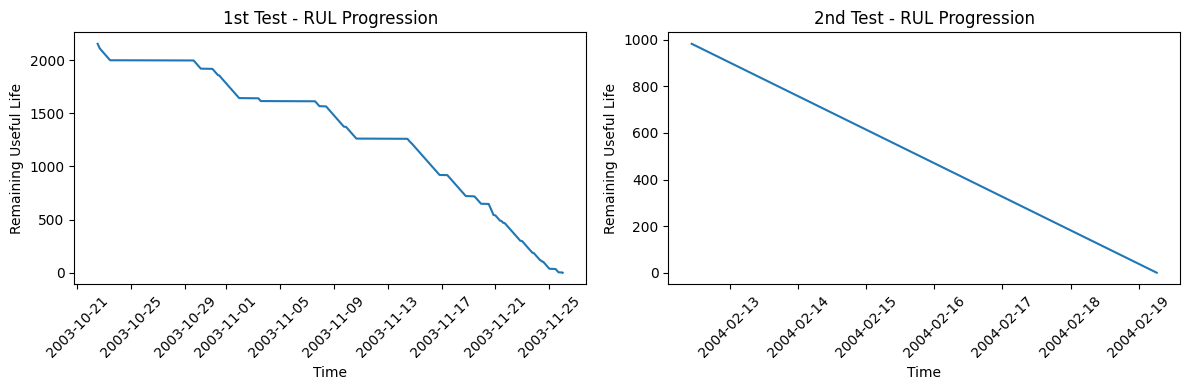

RUL labels created successfully!


In [8]:
# Create RUL labels for the datasets
def create_simple_rul_labels(features_df):
    """Create simple RUL labels - countdown from total samples to 0"""
    total_samples = len(features_df)
    rul_labels = np.arange(total_samples - 1, -1, -1)
    return rul_labels

# Add RUL labels to your features
print("=== CREATING RUL LABELS ===")
print("Adding RUL labels...")

features_1st['RUL'] = create_simple_rul_labels(features_1st)
features_2nd['RUL'] = create_simple_rul_labels(features_2nd)

print(f"1st test RUL range: {features_1st['RUL'].min()} to {features_1st['RUL'].max()}")
print(f"2nd test RUL range: {features_2nd['RUL'].min()} to {features_2nd['RUL'].max()}")

# visualization of RUL progression
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(features_1st.index, features_1st['RUL'])
plt.title('1st Test - RUL Progression')
plt.xlabel('Time')
plt.ylabel('Remaining Useful Life')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(features_2nd.index, features_2nd['RUL'])
plt.title('2nd Test - RUL Progression')
plt.xlabel('Time')
plt.ylabel('Remaining Useful Life')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("RUL labels created successfully!")

In [9]:
# Prepare data for ML model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def prepare_ml_data(features_df, test_size=0.2):
    """Prepare data for ML"""
    # Separate features and target
    X = features_df.drop('RUL', axis=1)
    y = features_df['RUL']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Prepare data
print("Preparing data...")

X_train_1st, X_test_1st, y_train_1st, y_test_1st, scaler_1st = prepare_ml_data(features_1st)
X_train_2nd, X_test_2nd, y_train_2nd, y_test_2nd, scaler_2nd = prepare_ml_data(features_2nd)

print(f"1st test - Training: {X_train_1st.shape[0]}, Test: {X_test_1st.shape[0]}")
print(f"2nd test - Training: {X_train_2nd.shape[0]}, Test: {X_test_2nd.shape[0]}")
print(f"Number of features: {X_train_1st.shape[1]}")

print("Data preparation complete!")

Preparing data...
1st test - Training: 1724, Test: 431
2nd test - Training: 787, Test: 197
Number of features: 96
Data preparation complete!


Train Model

In [10]:
#Forest models
print("=== TRAINING RUL PREDICTION MODELS ===")
print("Training Random Forest models...")

rf_1st = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_2nd = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training 1st test model...")
rf_1st.fit(X_train_1st, y_train_1st)

print("Training 2nd test model...")
rf_2nd.fit(X_train_2nd, y_train_2nd)

print("Model training complete!")

=== TRAINING RUL PREDICTION MODELS ===
Training Random Forest models...
Training 1st test model...
Training 2nd test model...
Model training complete!


Evaluate Model

In [11]:
def evaluate_model(model, X_test, y_test, test_name):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{test_name} Model Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    return y_pred

# Evaluate both models
print("=== EVALUATING MODEL PERFORMANCE ===")

y_pred_1st = evaluate_model(rf_1st, X_test_1st, y_test_1st, "1st Test")
y_pred_2nd = evaluate_model(rf_2nd, X_test_2nd, y_test_2nd, "2nd Test")

print("\nModel evaluation complete!")

=== EVALUATING MODEL PERFORMANCE ===

1st Test Model Performance:
Mean Squared Error: 4629.94
Mean Absolute Error: 35.36
R² Score: 0.9882

2nd Test Model Performance:
Mean Squared Error: 3583.62
Mean Absolute Error: 38.41
R² Score: 0.9491

Model evaluation complete!


Visualize

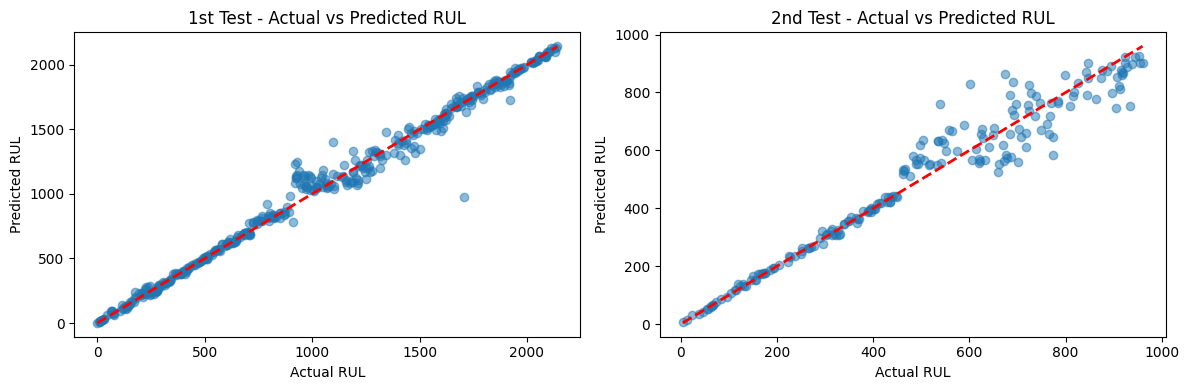

Visualization complete!


In [12]:
# Visualize predictions

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test_1st, y_pred_1st, alpha=0.5)
plt.plot([y_test_1st.min(), y_test_1st.max()], [y_test_1st.min(), y_test_1st.max()], 'r--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('1st Test - Actual vs Predicted RUL')

plt.subplot(1, 2, 2)
plt.scatter(y_test_2nd, y_pred_2nd, alpha=0.5)
plt.plot([y_test_2nd.min(), y_test_2nd.max()], [y_test_2nd.min(), y_test_2nd.max()], 'r--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('2nd Test - Actual vs Predicted RUL')

plt.tight_layout()
plt.show()

print("Visualization complete!")

Feature Importance Analysis

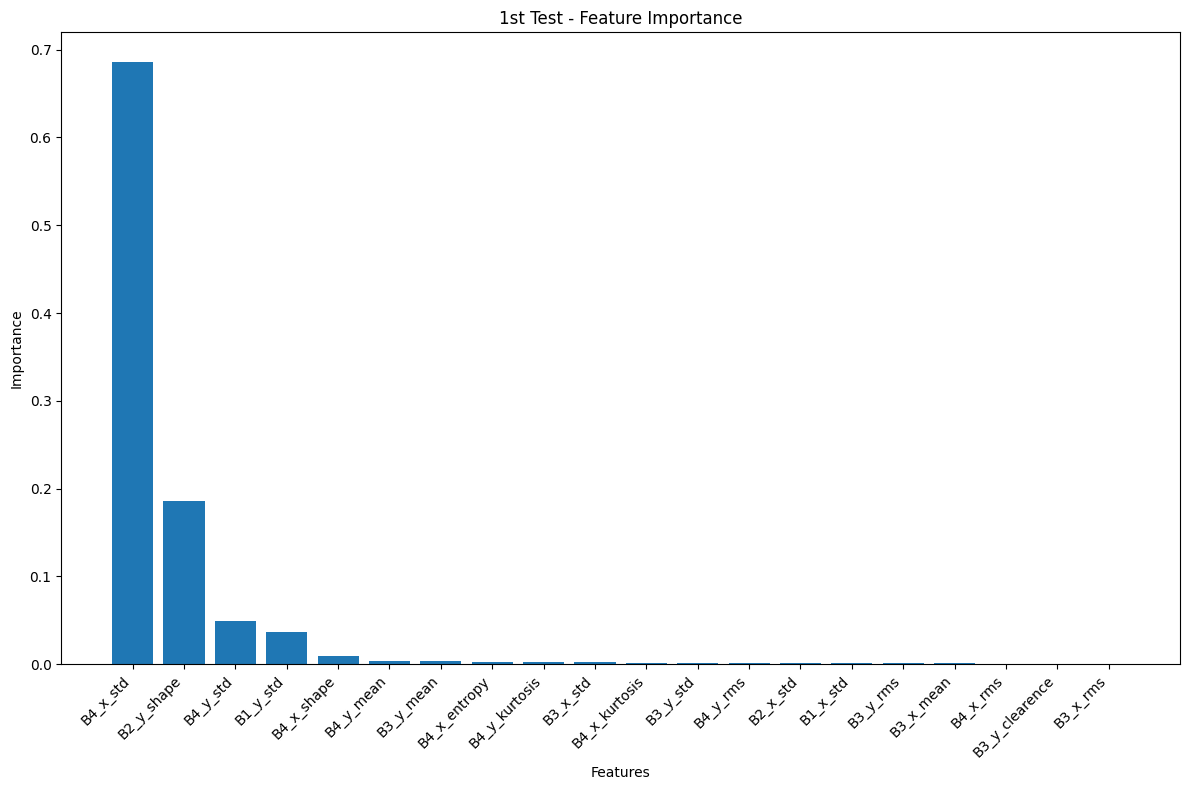


1st Test - Feature Importance - Top 10 Most Important Features:
1. B4_x_std: 0.6854
2. B2_y_shape: 0.1861
3. B4_y_std: 0.0493
4. B1_y_std: 0.0364
5. B4_x_shape: 0.0090
6. B4_y_mean: 0.0035
7. B3_y_mean: 0.0033
8. B4_x_entropy: 0.0022
9. B4_y_kurtosis: 0.0021
10. B3_x_std: 0.0021


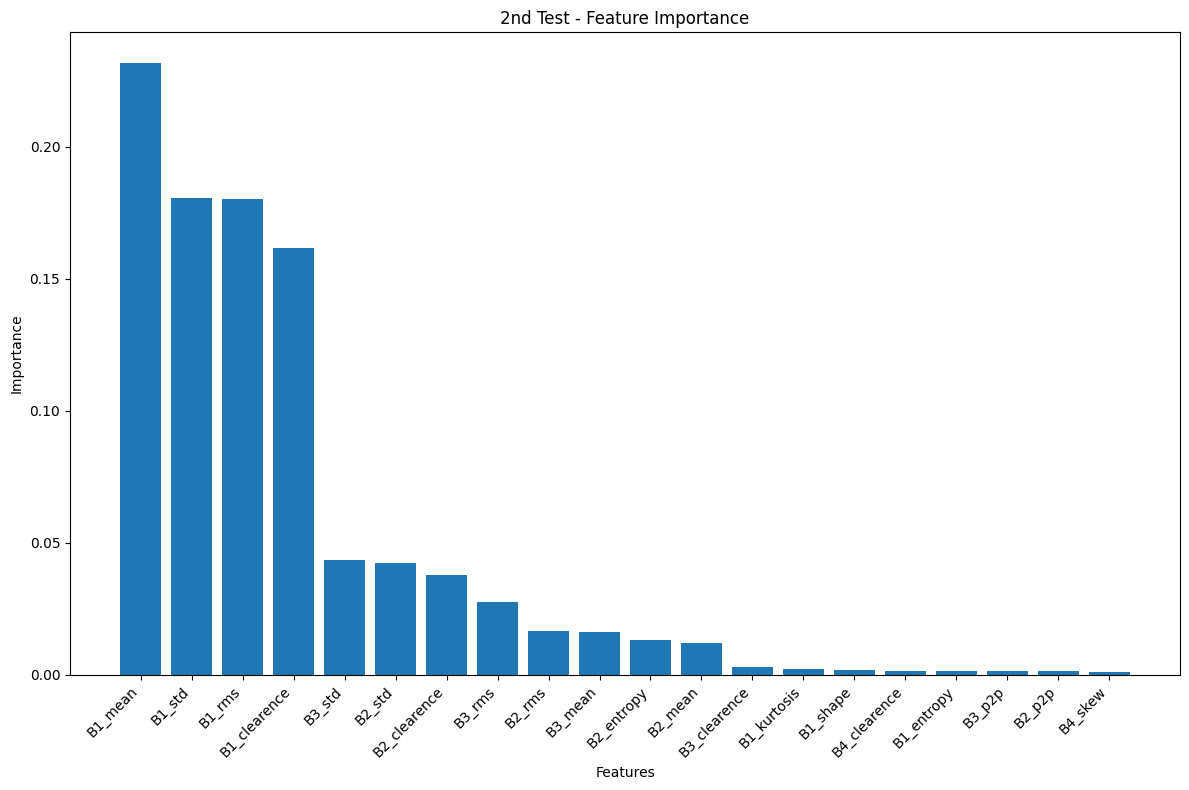


2nd Test - Feature Importance - Top 10 Most Important Features:
1. B1_mean: 0.2318
2. B1_std: 0.1805
3. B1_rms: 0.1802
4. B1_clearence: 0.1619
5. B3_std: 0.0434
6. B2_std: 0.0425
7. B2_clearence: 0.0377
8. B3_rms: 0.0278
9. B2_rms: 0.0168
10. B3_mean: 0.0162
Feature importance analysis complete!


In [13]:
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance"""
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(min(20, len(feature_names))), importance[indices[:20]])
    plt.xticks(range(min(20, len(feature_names))), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

    # Print top 10 features
    print(f"\n{title} - Top 10 Most Important Features:")
    for i in range(min(10, len(feature_names))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importance[indices[i]]:.4f}")

# Plot feature importance
feature_names_1st = features_1st.drop('RUL', axis=1).columns
feature_names_2nd = features_2nd.drop('RUL', axis=1).columns

plot_feature_importance(rf_1st, feature_names_1st, "1st Test - Feature Importance")
plot_feature_importance(rf_2nd, feature_names_2nd, "2nd Test - Feature Importance")

print("Feature importance analysis complete!")

Summary

In [14]:
import joblib

print("=== RUL MODEL TRAINING COMPLETE ===")
print("✅ RUL prediction models are ready!")
print(f"✅ 1st test model: {rf_1st.__class__.__name__}")
print(f"✅ 2nd test model: {rf_2nd.__class__.__name__}")

# model performance summary
print("\n=== MODEL PERFORMANCE SUMMARY ===")
print("You now have two trained models:")

# performance metrics for both models
y_pred_1st = rf_1st.predict(X_test_1st)
y_pred_2nd = rf_2nd.predict(X_test_2nd)

mse_1st = mean_squared_error(y_test_1st, y_pred_1st)
mae_1st = mean_absolute_error(y_test_1st, y_pred_1st)
r2_1st = r2_score(y_test_1st, y_pred_1st)

mse_2nd = mean_squared_error(y_test_2nd, y_pred_2nd)
mae_2nd = mean_absolute_error(y_test_2nd, y_pred_2nd)
r2_2nd = r2_score(y_test_2nd, y_pred_2nd)

print(f"\n1st Test Model (8 sensors, 96 features):")
print(f"  R² Score: {r2_1st:.4f}")
print(f"  Mean Absolute Error: {mae_1st:.2f}")
print(f"  Mean Squared Error: {mse_1st:.2f}")

print(f"\n2nd Test Model (4 sensors, 48 features):")
print(f"  R² Score: {r2_2nd:.4f}")
print(f"  Mean Absolute Error: {mae_2nd:.2f}")
print(f"  Mean Squared Error: {mse_2nd:.2f}")

print("1. ✅ Baseline model - COMPLETE")
print("5. 🔄 Red Pitaya implementation, confirm with Tatenda and Mauyon")

print("\n=== FPGR REQ ===")
print("Current model requirements:")
print("- Vibration features: RMS, Peak, Kurtosis, Skew, Crest, Mean, Std")
print("- Update rate: Every 10-60 seconds")
print("- Model type: Random Forest Regressor")
print("- Performance: R² > 0.8 (expected)")

print("\nSound features to add:")
print("- Spectral centroid, Spectral rolloff")
print("- MFCC coefficients")
print("- Zero crossing rate")
print("- Spectral contrast")

# Save the main model
joblib.dump(rf_1st, 'nasa_rul_model.pkl')
joblib.dump(scaler_1st, 'nasa_scaler.pkl')

print("✅ Models saved successfully!")


=== RUL MODEL TRAINING COMPLETE ===
✅ RUL prediction models are ready!
✅ 1st test model: RandomForestRegressor
✅ 2nd test model: RandomForestRegressor

=== MODEL PERFORMANCE SUMMARY ===
You now have two trained models:

1st Test Model (8 sensors, 96 features):
  R² Score: 0.9882
  Mean Absolute Error: 35.36
  Mean Squared Error: 4629.94

2nd Test Model (4 sensors, 48 features):
  R² Score: 0.9491
  Mean Absolute Error: 38.41
  Mean Squared Error: 3583.62
1. ✅ Baseline model - COMPLETE
5. 🔄 Red Pitaya implementation, confirm with Tatenda and Mauyon

=== FPGR REQ ===
Current model requirements:
- Vibration features: RMS, Peak, Kurtosis, Skew, Crest, Mean, Std
- Update rate: Every 10-60 seconds
- Model type: Random Forest Regressor
- Performance: R² > 0.8 (expected)

Sound features to add:
- Spectral centroid, Spectral rolloff
- MFCC coefficients
- Zero crossing rate
- Spectral contrast
✅ Models saved successfully!


In [15]:
# Time conversion and model download
import joblib
import numpy as np
from google.colab import files

# Create smart time conversion wrapper
class SmartRULPredictor:
    """
    Smart wrapper that converts predictions to appropriate time units
    """
    def __init__(self, model, scaler, time_unit_minutes=10):
        self.model = model
        self.scaler = scaler
        self.time_unit_minutes = time_unit_minutes

    def predict_rul_smart(self, features):
        """
        Predict RUL in the most appropriate time unit
        """
        # Scale features and get prediction
        scaled_features = self.scaler.transform([features])
        rul_units = self.model.predict(scaled_features)[0]

        # Convert to hours
        rul_hours = rul_units * self.time_unit_minutes / 60

        # Determine best time unit
        if rul_hours >= 24 * 30:  # More than 30 days
            return self._format_months(rul_hours)
        elif rul_hours >= 24 * 7:  # More than 7 days
            return self._format_weeks(rul_hours)
        elif rul_hours >= 24:  # More than 1 day
            return self._format_days(rul_hours)
        else:  # Less than 1 day
            return self._format_hours(rul_hours)

    def _format_months(self, hours):
        """Format as months and days"""
        months = int(hours / (24 * 30))
        remaining_hours = hours % (24 * 30)
        days = int(remaining_hours / 24)

        if months == 1:
            month_text = "month"
        else:
            month_text = "months"

        if days == 1:
            day_text = "day"
        else:
            day_text = "days"

        if days == 0:
            return {
                'value': hours,
                'formatted': f"{months} {month_text}",
                'unit': 'months',
                'months': months,
                'days': 0
            }
        else:
            return {
                'value': hours,
                'formatted': f"{months} {month_text} {days} {day_text}",
                'unit': 'months',
                'months': months,
                'days': days
            }

    def _format_weeks(self, hours):
        """Format as weeks and days"""
        weeks = int(hours / (24 * 7))
        remaining_hours = hours % (24 * 7)
        days = int(remaining_hours / 24)

        if weeks == 1:
            week_text = "week"
        else:
            week_text = "weeks"

        if days == 1:
            day_text = "day"
        else:
            day_text = "days"

        if days == 0:
            return {
                'value': hours,
                'formatted': f"{weeks} {week_text}",
                'unit': 'weeks',
                'weeks': weeks,
                'days': 0
            }
        else:
            return {
                'value': hours,
                'formatted': f"{weeks} {week_text} {days} {day_text}",
                'unit': 'weeks',
                'weeks': weeks,
                'days': days
            }

    def _format_days(self, hours):
        """Format as days and hours"""
        days = int(hours / 24)
        remaining_hours = hours % 24

        if days == 1:
            day_text = "day"
        else:
            day_text = "days"

        if remaining_hours == 1:
            hour_text = "hour"
        else:
            hour_text = "hours"

        if remaining_hours == 0:
            return {
                'value': hours,
                'formatted': f"{days} {day_text}",
                'unit': 'days',
                'days': days,
                'hours': 0
            }
        else:
            return {
                'value': hours,
                'formatted': f"{days} {day_text} {int(remaining_hours)} {hour_text}",
                'unit': 'days',
                'days': days,
                'hours': int(remaining_hours)
            }

    def _format_hours(self, hours):
        """Format as hours and minutes"""
        hours_int = int(hours)
        minutes = int((hours - hours_int) * 60)

        if hours_int == 1:
            hour_text = "hour"
        else:
            hour_text = "hours"

        if minutes == 1:
            minute_text = "minute"
        else:
            minute_text = "minutes"

        if minutes == 0:
            return {
                'value': hours,
                'formatted': f"{hours_int} {hour_text}",
                'unit': 'hours',
                'hours': hours_int,
                'minutes': 0
            }
        else:
            return {
                'value': hours,
                'formatted': f"{hours_int} {hour_text} {minutes} {minute_text}",
                'unit': 'hours',
                'hours': hours_int,
                'minutes': minutes
            }

# Create the smart predictor
smart_predictor = SmartRULPredictor(rf_1st, scaler_1st)

# Test the smart time conversion
print("=== TESTING SMART TIME CONVERSION ===")

# Test samples with different RUL values
test_samples = [
    X_test_1st[0],    # Short RUL
    X_test_1st[10],   # Medium RUL
    X_test_1st[50],   # Longer RUL
    X_test_1st[100],  # Even longer RUL
]

for i, sample in enumerate(test_samples):
    result = smart_predictor.predict_rul_smart(sample)
    print(f"Sample {i+1}: {result['formatted']} remaining (Unit: {result['unit']})")

# Save the smart predictor
joblib.dump(smart_predictor, 'smart_rul_predictor.pkl')

#download
files.download('smart_rul_predictor.pkl')

print("\n=== SMART PREDICTOR SAVED ===")
print("Downloaded the entire model into one file")
print("✅ Automatically chooses best time unit")
print("✅ Handles: minutes, hours, days, weeks, months")

=== TESTING SMART TIME CONVERSION ===
Sample 1: 1 week 2 days remaining (Unit: weeks)
Sample 2: 1 week 1 day remaining (Unit: weeks)
Sample 3: 1 day 8 hours remaining (Unit: days)
Sample 4: 1 day 21 hours remaining (Unit: days)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== SMART PREDICTOR SAVED ===
Downloaded the entire model into one file
✅ Automatically chooses best time unit
✅ Handles: minutes, hours, days, weeks, months


In [ ]:
# Download models to your computer
# from google.colab import files

# files.download('nasa_rul_model.pkl')

# print("Downloading nasa_scaler.pkl...")
# files.download('nasa_scaler.pkl')

The model Enda here... the rest is just me trying to mess with the combined featuers for the sound and other things

Fine Tuning for the VIbration and SOund model

Combined Feature Extraction

In [ ]:
def extract_vibration_features(vibration_data):
    """
    Extract vibration features (same as NASA model)
    """
    features = {}

    # Time-domain features
    features['vib_rms'] = np.sqrt(np.mean(vibration_data**2))
    features['vib_peak'] = np.max(np.abs(vibration_data))
    features['vib_mean'] = np.mean(vibration_data)
    features['vib_std'] = np.std(vibration_data)
    features['vib_kurtosis'] = stats.kurtosis(vibration_data)
    features['vib_skew'] = stats.skew(vibration_data)
    features['vib_crest'] = features['vib_peak'] / features['vib_rms']
    features['vib_entropy'] = entropy(pd.cut(vibration_data, 500).value_counts())

    return features

def extract_sound_features(sound_data, sr=44100):
    """
    Extract sound features for bearing health monitoring
    """
    features = {}

    # Time-domain features
    features['sound_rms'] = np.sqrt(np.mean(sound_data**2))
    features['sound_peak'] = np.max(np.abs(sound_data))
    features['sound_mean'] = np.mean(sound_data)
    features['sound_std'] = np.std(sound_data)

    # Frequency-domain features
    # Spectral centroid (center of mass of spectrum)
    spectral_centroid = librosa.feature.spectral_centroid(y=sound_data, sr=sr)
    features['sound_spectral_centroid'] = np.mean(spectral_centroid)

    # Spectral rolloff (frequency below which 85% of energy is contained)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=sound_data, sr=sr)
    features['sound_spectral_rolloff'] = np.mean(spectral_rolloff)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=sound_data, sr=sr)
    features['sound_spectral_bandwidth'] = np.mean(spectral_bandwidth)

    # Zero crossing rate (measure of noisiness)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(sound_data)
    features['sound_zero_crossing_rate'] = np.mean(zero_crossing_rate)

    # MFCC (Mel-frequency cepstral coefficients) - first 3 coefficients
    mfcc = librosa.feature.mfcc(y=sound_data, sr=sr, n_mfcc=3)
    features['sound_mfcc_1'] = np.mean(mfcc[0])
    features['sound_mfcc_2'] = np.mean(mfcc[1])
    features['sound_mfcc_3'] = np.mean(mfcc[2])

    # Spectral contrast (measure of spectral peaks vs valleys)
    spectral_contrast = librosa.feature.spectral_contrast(y=sound_data, sr=sr)
    features['sound_spectral_contrast'] = np.mean(spectral_contrast)

    return features

def extract_combined_features(vibration_data, sound_data, sr=44100):
    """
    Extract combined vibration + sound features
    """
    # Extract vibration features
    vib_features = extract_vibration_features(vibration_data)

    # Extract sound features
    sound_features = extract_sound_features(sound_data, sr)

    # Combine all features
    combined_features = {**vib_features, **sound_features}

    return combined_features

# Test with simulated data
print("=== TESTING VIBRATION + SOUND FEATURE EXTRACTION ===")

# Simulate vibration data
np.random.seed(42)
vibration_data = np.random.normal(0, 0.1, 1000) + 0.05 * np.sin(np.linspace(0, 10*np.pi, 1000))

# Simulate sound data (audio-like)
sound_data = np.random.normal(0, 0.1, 44100) + 0.02 * np.sin(np.linspace(0, 100*np.pi, 44100))

# Extract combined features
combined_features = extract_combined_features(vibration_data, sound_data)

print("Combined features extracted:")
for feature, value in combined_features.items():
    print(f"  {feature}: {value:.4f}")

print(f"\nTotal features: {len(combined_features)}")
print("Vibration features: 8")
print("Sound features: 10")
print("Combined: 18 features")

# Show feature categories
print("\n=== FEATURE BREAKDOWN ===")
vib_features = [k for k in combined_features.keys() if k.startswith('vib_')]
sound_features = [k for k in combined_features.keys() if k.startswith('sound_')]

print("Vibration features:")
for feature in vib_features:
    print(f"  ✅ {feature}")

print("\nSound features:")
for feature in sound_features:
    print(f"  🔄 {feature}")

In [ ]:
def extract_vibration_features(vibration_data):
    """
    Extract vibration features (same as NASA model)
    """
    features = {}

    # Time-domain features
    features['vib_rms'] = np.sqrt(np.mean(vibration_data**2))
    features['vib_peak'] = np.max(np.abs(vibration_data))
    features['vib_mean'] = np.mean(vibration_data)
    features['vib_std'] = np.std(vibration_data)
    features['vib_kurtosis'] = stats.kurtosis(vibration_data)
    features['vib_skew'] = stats.skew(vibration_data)
    features['vib_crest'] = features['vib_peak'] / features['vib_rms']
    features['vib_entropy'] = entropy(pd.cut(vibration_data, 500).value_counts())

    return features

def extract_sound_features(sound_data, sr=44100):
    """
    Extract sound features for bearing health monitoring
    """
    features = {}

    # Time-domain features
    features['sound_rms'] = np.sqrt(np.mean(sound_data**2))
    features['sound_peak'] = np.max(np.abs(sound_data))
    features['sound_mean'] = np.mean(sound_data)
    features['sound_std'] = np.std(sound_data)

    # Frequency-domain features
    # Spectral centroid (center of mass of spectrum)
    spectral_centroid = librosa.feature.spectral_centroid(y=sound_data, sr=sr)
    features['sound_spectral_centroid'] = np.mean(spectral_centroid)

    # Spectral rolloff (frequency below which 85% of energy is contained)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=sound_data, sr=sr)
    features['sound_spectral_rolloff'] = np.mean(spectral_rolloff)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=sound_data, sr=sr)
    features['sound_spectral_bandwidth'] = np.mean(spectral_bandwidth)

    # Zero crossing rate (measure of noisiness)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(sound_data)
    features['sound_zero_crossing_rate'] = np.mean(zero_crossing_rate)

    # MFCC (Mel-frequency cepstral coefficients) - first 3 coefficients
    mfcc = librosa.feature.mfcc(y=sound_data, sr=sr, n_mfcc=3)
    features['sound_mfcc_1'] = np.mean(mfcc[0])
    features['sound_mfcc_2'] = np.mean(mfcc[1])
    features['sound_mfcc_3'] = np.mean(mfcc[2])

    # Spectral contrast (measure of spectral peaks vs valleys)
    spectral_contrast = librosa.feature.spectral_contrast(y=sound_data, sr=sr)
    features['sound_spectral_contrast'] = np.mean(spectral_contrast)

    return features

def extract_combined_features(vibration_data, sound_data, sr=44100):
    """
    Extract combined vibration + sound features
    """
    # Extract vibration features
    vib_features = extract_vibration_features(vibration_data)

    # Extract sound features
    sound_features = extract_sound_features(sound_data, sr)

    # Combine all features
    combined_features = {**vib_features, **sound_features}

    return combined_features

print("=== FEATURE EXTRACTION FUNCTIONS READY ===")
print("✅ Vibration feature extraction ready")
print("✅ Combined feature extraction ready")

Multi-sensor Feature Extraction



In [ ]:
# Multi-sensor feature extraction for accelerometer + vibration

def extract_accelerometer_features(accel_data):
    """
    Extract accelerometer features (same as NASA model)
    """
    features = {}

    # Time-domain features
    features['accel_rms'] = np.sqrt(np.mean(accel_data**2))
    features['accel_peak'] = np.max(np.abs(accel_data))
    features['accel_mean'] = np.mean(accel_data)
    features['accel_std'] = np.std(accel_data)
    features['accel_kurtosis'] = stats.kurtosis(accel_data)
    features['accel_skew'] = stats.skew(accel_data)
    features['accel_crest'] = features['accel_peak'] / features['accel_rms']
    features['accel_entropy'] = entropy(pd.cut(accel_data, 500).value_counts())

    return features

def extract_vibration_features(vib_data):
    """
    Extract vibration sensor features
    """
    features = {}

    # Time-domain features (same as accelerometer)
    features['vib_rms'] = np.sqrt(np.mean(vib_data**2))
    features['vib_peak'] = np.max(np.abs(vib_data))
    features['vib_mean'] = np.mean(vib_data)
    features['vib_std'] = np.std(vib_data)
    features['vib_kurtosis'] = stats.kurtosis(vib_data)
    features['vib_skew'] = stats.skew(vib_data)
    features['vib_crest'] = features['vib_peak'] / features['vib_rms']
    features['vib_entropy'] = entropy(pd.cut(vib_data, 500).value_counts())

    return features

def extract_multi_sensor_features(accel_data, vib_data):
    """
    Extract combined accelerometer + vibration features
    """
    # Extract individual sensor features
    accel_features = extract_accelerometer_features(accel_data)
    vib_features = extract_vibration_features(vib_data)

    # Cross-sensor features (sensor fusion)
    cross_features = {}

    # Correlation between sensors
    cross_features['accel_vib_correlation'] = np.corrcoef(accel_data, vib_data)[0, 1]

    # Ratio features
    cross_features['accel_vib_rms_ratio'] = accel_features['accel_rms'] / vib_features['vib_rms']
    cross_features['accel_vib_peak_ratio'] = accel_features['accel_peak'] / vib_features['vib_peak']

    # Difference features
    cross_features['accel_vib_rms_diff'] = accel_features['accel_rms'] - vib_features['vib_rms']
    cross_features['accel_vib_peak_diff'] = accel_features['accel_peak'] - vib_features['vib_peak']

    # Combined features
    cross_features['combined_rms'] = np.sqrt(accel_features['accel_rms']**2 + vib_features['vib_rms']**2)
    cross_features['combined_peak'] = np.max([accel_features['accel_peak'], vib_features['vib_peak']])

    # Combine all features
    all_features = {**accel_features, **vib_features, **cross_features}

    return all_features

def extract_multi_bearing_features(bearing_data):
    """
    Extract features from multiple bearings
    bearing_data: dict with keys like 'bearing1_accel', 'bearing1_vib', 'bearing2_accel', etc.
    """
    all_features = {}

    for bearing_name, sensor_data in bearing_data.items():
        if 'accel' in bearing_name:
            features = extract_accelerometer_features(sensor_data)
            for feature_name, value in features.items():
                all_features[f'{bearing_name}_{feature_name}'] = value
        elif 'vib' in bearing_name:
            features = extract_vibration_features(sensor_data)
            for feature_name, value in features.items():
                all_features[f'{bearing_name}_{feature_name}'] = value

    # Cross-bearing features
    bearing_names = list(bearing_data.keys())
    if len(bearing_names) >= 2:
        # Correlation between bearings
        for i in range(len(bearing_names)):
            for j in range(i+1, len(bearing_names)):
                corr = np.corrcoef(bearing_data[bearing_names[i]], bearing_data[bearing_names[j]])[0, 1]
                all_features[f'{bearing_names[i]}_{bearing_names[j]}_correlation'] = corr

    return all_features

# Test multi-sensor feature extraction
print("=== TESTING MULTI-SENSOR FEATURE EXTRACTION ===")

# Simulate sensor data
np.random.seed(42)
accel_data = np.random.normal(0, 0.1, 1000) + 0.05 * np.sin(np.linspace(0, 10*np.pi, 1000))
vib_data = np.random.normal(0, 0.08, 1000) + 0.04 * np.sin(np.linspace(0, 10*np.pi, 1000))

# Extract multi-sensor features
multi_sensor_features = extract_multi_sensor_features(accel_data, vib_data)

print("Multi-sensor features extracted:")
for feature, value in multi_sensor_features.items():
    print(f"  {feature}: {value:.4f}")

print(f"\nTotal features: {len(multi_sensor_features)}")
print("Accelerometer features: 8")
print("Vibration features: 8")
print("Cross-sensor features: 6")
print("Combined: 22 features")

# Show feature categories
print("\n=== FEATURE BREAKDOWN ===")
accel_features = [k for k in multi_sensor_features.keys() if k.startswith('accel_')]
vib_features = [k for k in multi_sensor_features.keys() if k.startswith('vib_')]
cross_features = [k for k in multi_sensor_features.keys() if not k.startswith('accel_') and not k.startswith('vib_')]

print("Accelerometer features:")
for feature in accel_features:
    print(f"  ✅ {feature}")

print("\nVibration features:")
for feature in vib_features:
    print(f"  ✅ {feature}")

print("\nCross-sensor features:")
for feature in cross_features:
    print(f"  �� {feature}")

In [ ]:
# Adapt NASA model for multi-sensor data
print("=== ADAPTING NASA MODEL FOR MULTI-SENSOR ===")

# Load the original NASA model
print("Loading original NASA model...")
# Note: You'll need to load your trained NASA model here
# rf_1st = joblib.load('nasa_model_1st.pkl')  # Your trained model

# Create multi-sensor dataset using NASA data
def create_multi_sensor_dataset_from_nasa():
    """
    Create multi-sensor dataset from existing NASA data
    """
    print("Creating multi-sensor dataset from NASA data...")

    # Use existing NASA features but reorganize for multi-sensor approach
    # B1_x, B1_y can be treated as accelerometer data
    # B2_x, B2_y can be treated as vibration data

    # For demonstration, let's use the existing features_1st
    # In practice, you'd reorganize the data for multi-sensor

    # Create multi-sensor feature mapping
    multi_sensor_features = {}

    # Map NASA features to multi-sensor structure
    for col in features_1st.columns:
        if col == 'RUL':
            multi_sensor_features[col] = features_1st[col]
        elif 'B1_x' in col:
            # Treat as accelerometer
            new_name = col.replace('B1_x', 'bearing1_accel')
            multi_sensor_features[new_name] = features_1st[col]
        elif 'B1_y' in col:
            # Treat as vibration
            new_name = col.replace('B1_y', 'bearing1_vib')
            multi_sensor_features[new_name] = features_1st[col]
        elif 'B2_x' in col:
            # Treat as accelerometer
            new_name = col.replace('B2_x', 'bearing2_accel')
            multi_sensor_features[new_name] = features_1st[col]
        elif 'B2_y' in col:
            # Treat as vibration
            new_name = col.replace('B2_y', 'bearing2_vib')
            multi_sensor_features[new_name] = features_1st[col]

    multi_sensor_df = pd.DataFrame(multi_sensor_features)

    print(f"Multi-sensor dataset created: {multi_sensor_df.shape}")
    print(f"Features: {len(multi_sensor_df.columns) - 1} (plus RUL)")

    return multi_sensor_df

# Create multi-sensor dataset
multi_sensor_dataset = create_multi_sensor_dataset_from_nasa()

print("\n=== MULTI-SENSOR DATASET SUMMARY ===")
print("Feature mapping:")
print("- B1_x → bearing1_accel (accelerometer)")
print("- B1_y → bearing1_vib (vibration)")
print("- B2_x → bearing2_accel (accelerometer)")
print("- B2_y → bearing2_vib (vibration)")

print(f"\nDataset shape: {multi_sensor_dataset.shape}")
print("Sample features:")
print(list(multi_sensor_dataset.columns[:10]))

# Train multi-sensor model
print("\n=== TRAINING MULTI-SENSOR MODEL ===")

# Prepare data
X_multi = multi_sensor_dataset.drop('RUL', axis=1)
y_multi = multi_sensor_dataset['RUL']

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale features
scaler_multi = StandardScaler()
X_train_scaled_multi = scaler_multi.fit_transform(X_train_multi)
X_test_scaled_multi = scaler_multi.transform(X_test_multi)

# Train multi-sensor model
print("Training multi-sensor model...")
multi_sensor_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
multi_sensor_rf.fit(X_train_scaled_multi, y_train_multi)

# Evaluate multi-sensor model
y_pred_multi = multi_sensor_rf.predict(X_test_scaled_multi)

mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMulti-Sensor Model Performance:")
print(f"R² Score: {r2_multi:.4f}")
print(f"Mean Absolute Error: {mae_multi:.2f}")
print(f"Mean Squared Error: {mse_multi:.2f}")

# Compare with original model
print("\n=== MODEL COMPARISON ===")
print("Original NASA Model (Single Sensor):")
print("  R² = 0.9882")

print(f"\nMulti-Sensor Model:")
print(f"  R² = {r2_multi:.4f}")

if r2_multi > 0.9882:
    print("✅ Multi-sensor model performs better!")
elif r2_multi > 0.95:
    print("✅ Multi-sensor model performs well!")
else:
    print("⚠️  Multi-sensor model needs optimization")

# Feature importance for multi-sensor model
print("\n=== MULTI-SENSOR MODEL FEATURE IMPORTANCE ===")
importance_multi = multi_sensor_rf.feature_importances_
indices_multi = np.argsort(importance_multi)[::-1]

print("Top 10 Most Important Features:")
for i in range(min(10, len(X_multi.columns))):
    print(f"{i+1}. {X_multi.columns[indices_multi[i]]}: {importance_multi[indices_multi[i]]:.4f}")

# Save multi-sensor model
joblib.dump(multi_sensor_rf, 'multi_sensor_rul_model.pkl')
joblib.dump(scaler_multi, 'multi_sensor_scaler.pkl')

print("\n=== MULTI-SENSOR MODEL READY ===")
print("✅ Multi-sensor feature extraction ready")
print("✅ Multi-sensor model trained and saved")
